# Classification of Agro-Ecological System using OTU data from the CA-SYS dataset

CA-SYS is an INRAE experimental platform near Dijon (France). Its main scientific objective is to investigate and design agro-ecological farming systems without pesticides. 

The experimental design investigate 4 different types of farming systems
1. *Semi direct* (SD) with a 12 years crop rotation
    * SD1 Permanent: no soil tilling
    * SD2 Non-permanent: soil tilling up to 5cm
2. *Travail du sol* (TS)
    * TS1: add exogeneous nitrogen (N) with a 6 year crop rotation
    * TS2: do not add any exogeneous nitrogen

For each of these 4 different types, the bacterial community is sampled.

**Goal**: the goal of this challenge is to do supervised classification of the type of soil given the bacterial community.

> The experiments and databases are in french, hence some column name and labels might be in french (*e.g.* `Annee` which means years) 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from problem import get_train_data, get_test_data

X_train, y_train = get_train_data()
X_test, y_test = get_test_data()

In [3]:
lab_df = pd.DataFrame({"label": y_train})
lab_df.value_counts(normalize=True)

label
TS2      0.265101
TS1      0.265101
SD2      0.234899
SD1      0.234899
Name: proportion, dtype: float64

<Axes: >

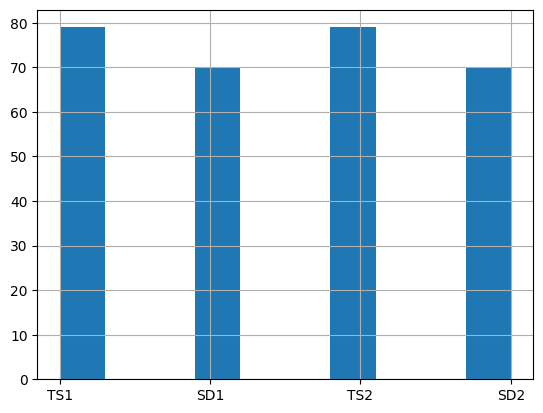

In [4]:
lab_df.label.hist()

In [5]:
print(X_train.shape)
print(type(X_train))

(298, 10634)
<class 'numpy.ndarray'>


In [6]:
_REMOVE_COL_IDX = [0]


def _preprocess_X(X):
    """
    This is a very basic preprocessor that only drops the "Parcelle" columns. A more refined pre-processing should be tried.
    """

    # --- Remove the `"Parcelle"` column from features (cannot be used)
    X_otu = np.delete(X, _REMOVE_COL_IDX, axis=1).astype(np.float64)

    # --- Implement your own pre-preprocessing
    # remove least variables OTU
    otu_sd = X_otu.std(axis=0)

    # threshold on OTU sd
    sd_threshold = 100
    keep_otu_ind = np.argwhere(otu_sd > sd_threshold).squeeze()

    X_preprocessed = X_otu[:, keep_otu_ind]
    return X_preprocessed

In [7]:
X_otu = np.delete(X_train, _REMOVE_COL_IDX, axis=1).astype(np.float64)
otu_sd = X_otu.std(axis=0)

In [8]:
np.argwhere(otu_sd > 10).squeeze().shape

(399,)

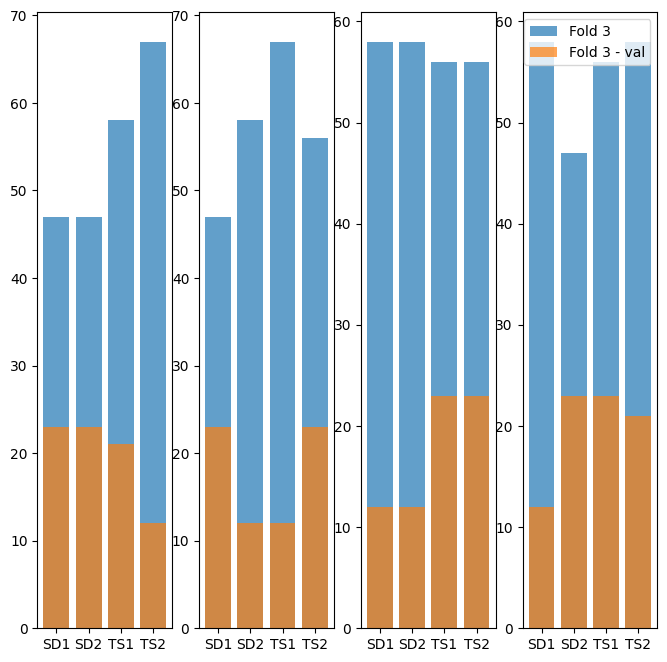

In [12]:
from problem import get_cv

folds = get_cv(X_train, y_train)
fig, axs = plt.subplots(1, 4, figsize=(8, 8))

for i, (train_is, valid_is) in enumerate(get_cv(X_train, y_train)):

    assert np.unique(y_train[train_is]).size == 4
    assert np.unique(y_train[valid_is]).size == 4
    axs[i].bar(
        *np.unique(y_train[train_is], return_counts=True), alpha=0.7, label=f"Fold {i}"
    )
    axs[i].bar(
        *np.unique(y_train[valid_is], return_counts=True),
        alpha=0.7,
        label=f"Fold {i} - val",
    )
plt.legend()